Author Name : Ade William Tabrani


This notebook is made to learn the factors that affect employee satisfaction in a company.

# Preface

Greetings. I’m a Human Resources (HR) Consultant working at Mercer, an HR consulting company. I got assigned to a client who is looking to improve their company’s employee satisfaction after they did their own research on companies like Costco and H.E.B where their care for the people and their employees benefited the company. The client company name is Celerium.

I’ve done, with ample help from Celerium, a survey of companies’ employees on several aspects of employee satisfaction. It’s now time to clean and analyze the data I have gained.


# Problem Statement

Before figuring out what aspects I would like to focus on, it’s great to refer back to our agreement on what questions I have to answer, and what goals are there for me to base my solution on, for the completion of this project.

	The questions:
1.	What are the top three factors that affect employee satisfaction in Celerium? How do those factors work/affect employee satisfaction?
2.	Who are the employees that are least satisfied in Celerium?
3.	How does salary play a role in employee satisfaction in Celerium?


The goal that my solution must help achieve: Increase employee satisfaction by 10%, 6 months after policy change. So, my solution will have to be a policy, or policy-like, with the goal in mind. This increase in satisfaction will benefit not only the employees, but companies who have happier employees have been shown to give out better performance (Ali et al., 2018). 

Before handing out the advices though, I need to: know which factors affect satisfaction level in Celerium.


# Data Loading

(Data was obtained from Kaggle titled "Employee Satisfaction Survey Data" by Zakari)

In [1]:
# set up lib


import pandas as pd
from scipy import stats
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

I'm going to load the data to a Pandas dataframe.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdeWT/Employee-Satisfaction-Project-AdeWT/main/Employee%20Satisfaction.csv', delimiter=',')

df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


# Data Cleaning

Let's explore the data a bit.

In [3]:
# exploring a bit

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.2+ MB


In [4]:
len(df['Emp ID'])

15787

There are 9 columns with 14,999 rows non-null. The length of one column returns 15,787 which means there are 788 rows of missing data.

From .info function it can be seen that the data are formatted correctly. Though I would like it if the name are uniform: Work_accident is capitalized on the front while the others are not, and there's a typo in 'average_montly_hours'

Let's check for duplicates.

In [5]:
df.duplicated().value_counts()

False    15000
True       787
Name: count, dtype: int64

From how the number of missing values and number of duplicates are the same, it seems that the duplicated values are the missing values -- they're all just empty so pandas flagged them as duplicates too.

 Let's remove the duplicates and the empty data.

In [6]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [7]:
len(df['Emp ID'])

14999

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, 0 to 15786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.3+ MB


The length of a column is now 14999, meaning 788 missing and duplicated rows have been removed.

Let's rename the columns next to format I prefer.

In [9]:
df.rename(columns = 
          {'Emp ID':'emp_ID'},
          inplace=True)

df.rename(columns = 
         {'average_montly_hours':'average_monthly_hours'},
          inplace=True)

df.rename(columns = 
          {'Work_accident':'work_accident'},
          inplace = True)

In [10]:
# check if change

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, 0 to 15786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   emp_ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_monthly_hours  14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.3+ MB


The column name change has been done.

In [11]:
df.head()

,emp_ID,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,dept,salary
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


# Analysis

## Descriptive Statistics

Let's check the central tendency and dispersion of the numerical data.

In [12]:
def descCol(columnName):
    rangeCol = df[columnName].max() - df[columnName].min()
    meanCol = df[columnName].mean()
    medCol = df[columnName].median()
    modeCol = df[columnName].mode()
    stdCol = df[columnName].std()
    varCol = df[columnName].var()
    skewCol = df[columnName].skew()
    curtCol = df[columnName].kurt()
    print(
       f'range of {columnName} is {"{:.2f}".format(rangeCol)}', '\n'
       f'mean of {columnName} is {"{:.2f}".format(meanCol)}', '\n'
       f'median of {columnName} is {medCol}', '\n'
       f'mode of {columnName} is {modeCol[0]}', '\n'
       f'standard deviation of {columnName} is {"{:.2f}".format(stdCol)}', '\n'
       f'variance of {columnName} is {"{:.2f}".format(varCol)}', '\n'
       f'skewness of {columnName} is {"{:.2f}".format(skewCol)}', '\n'
       f'kurtosis of {columnName} is {"{:.2f}".format(curtCol)}', '\n'
    )

descCol('satisfaction_level')
descCol('last_evaluation')
descCol('number_project')

range of satisfaction_level is 0.91 
mean of satisfaction_level is 0.61 
median of satisfaction_level is 0.64 
mode of satisfaction_level is 0.1 
standard deviation of satisfaction_level is 0.25 
variance of satisfaction_level is 0.06 
skewness of satisfaction_level is -0.48 
kurtosis of satisfaction_level is -0.67 

range of last_evaluation is 0.64 
mean of last_evaluation is 0.72 
median of last_evaluation is 0.72 
mode of last_evaluation is 0.55 
standard deviation of last_evaluation is 0.17 
variance of last_evaluation is 0.03 
skewness of last_evaluation is -0.03 
kurtosis of last_evaluation is -1.24 

range of number_project is 5.00 
mean of number_project is 3.80 
median of number_project is 4.0 
mode of number_project is 4.0 
standard deviation of number_project is 1.23 
variance of number_project is 1.52 
skewness of number_project is 0.34 
kurtosis of number_project is -0.50 



In [13]:
descCol('average_monthly_hours')
descCol('time_spend_company') # it's here so the output is not truncated

range of average_monthly_hours is 214.00 
mean of average_monthly_hours is 201.05 
median of average_monthly_hours is 200.0 
mode of average_monthly_hours is 135.0 
standard deviation of average_monthly_hours is 49.94 
variance of average_monthly_hours is 2494.31 
skewness of average_monthly_hours is 0.05 
kurtosis of average_monthly_hours is -1.13 

range of time_spend_company is 8.00 
mean of time_spend_company is 3.50 
median of time_spend_company is 3.0 
mode of time_spend_company is 3.0 
standard deviation of time_spend_company is 1.46 
variance of time_spend_company is 2.13 
skewness of time_spend_company is 1.85 
kurtosis of time_spend_company is 4.77 



From the descriptive statistics we can see that, in each column of the data:

- Satisfaction level: This data is the survey-ed satisfaction level, normalized to be a range of 0 to 1. Celerium company's employee's on average reported a 0.61 out of 1 satisfaction level, with the values mostly +- 0.17 from the average. Though it must be noted that a lot of employees gave out 0.1 or 1 out of 10 rating on satisfaction. So now we find out why we're here: a lot of the employees are not satisfied. 

    The data shows little negative skewness at -0.48, a negative skew, meaning there are more highly-rated satisfaction level than there are lowly-rated satisfaction level.

    Kurtosis value of the data shows -1.24, hence a platykurtic distribution, which means satisfaction level may has few outliers and extreme values.

- Last evaluation: This column is the scores of employees in their latest evaluation, which has been normalized to a range of 0 to 1. On average Celerium's employees are scored pretty high by their supervisors, standing at 0.72 out of 1, with most values swaying +- 0.17 from the average. Though, same with satisfaction level, the score most often appearing seems to be quite low at 0.55. We'll try to figure out what factors played in into that low a score as we further delve into the analysis. It's proven unsatisfied employees care less and hence do minimally (Safi and Arshi, 2016). It might be that.

    This column shows little to no skewness, at -0.03 skewness level, meaning the data is very slightly skewed to the right (more higher scores than lower ones). The kurtosis though, shows -1.24, meaning a platykurtic distribution where there may be few outliers/extreme values.

- Average monthly hours: rmembering that Celerium has their work days on Monday-Friday, the average of 201.05 is higher than what 8 hours a day times 22 days of work (30 days a month minus 4 Sat-Sun weekends) would be, 176 hours. This means there's around 25 hours of overtime in average, around 1,13 hour per day, which still seems acceptable, especially considering not all employees do that 1 hour overtime everyday, as the most-appearing answer is 135 hours of work per month on average. Average monthly hours mostly sway +- 49.94 from the average, meaning some employees are doing overtime quite a lot. It's important to look into this as usually overtime is detrimental to employee satisfaction (Ko and Jin, 2018): 

    That being said, the skewness of the data shows 0.05, meaning data mostly gather around the average with very slight positive skew/left skew: there are slightly more lower values than higher ones. The negative kurtosis level of -1.13 means platykurtic distribution with indication of few outliers.

- Number of Project: this data shows the number of projects employee was currently working on at time of survey. This data can be used to gauge engagement, which is known as a positive predictor of employee satisfaction (Vorina et al. 2017), and also can gauge overwork which may cause dis-satisfaction (Fabian and Breunig, 2019). On average, the employees have 3-4 projects they handle, as that range comes out in the mean and mode of this column. Number of projects sways from the mean +- 1.23, so some employee has more ongoing projects while some has less.

    This column has little skewness with value of 0.34, meaning there's more employees working less projects, though not by much. Kurtosis of the data is -0.5 which means a platykurtic distribution, indicates there may be few outliers.

- Time spend company: Most employee has spent 3 years in Celerium, with 3.5 as the average time spent in the company. This at least signs the no satisfaction or dis-satisfaction are not that bad to the point of causing resignation, so that's a good thing. We should see if the satisfaction goes up or down with time--perhaps boredom? Though research are conflicting, one say it's a factor to job satisfaction (Lorber and Savič, 2012) while other say it's an insignificant factor (Wong and Heng, 2009). The data sways +- 1.46 from the mean though, so there are still some newer employees.

    Skewness of this column shows 1.85, meaning data is highly skewed, meaning there are more newer employees than older ones. Data shows leptokurtic distributions with kurtosis being 4.77. This would be caused by people who have been in the company for a long time, as kurtosis is affected by extreme values.

Here we're going to see the histogram for each of the column of numerical data.

Text(0.5, 1.0, 'Average Monthly Hours Histogram')

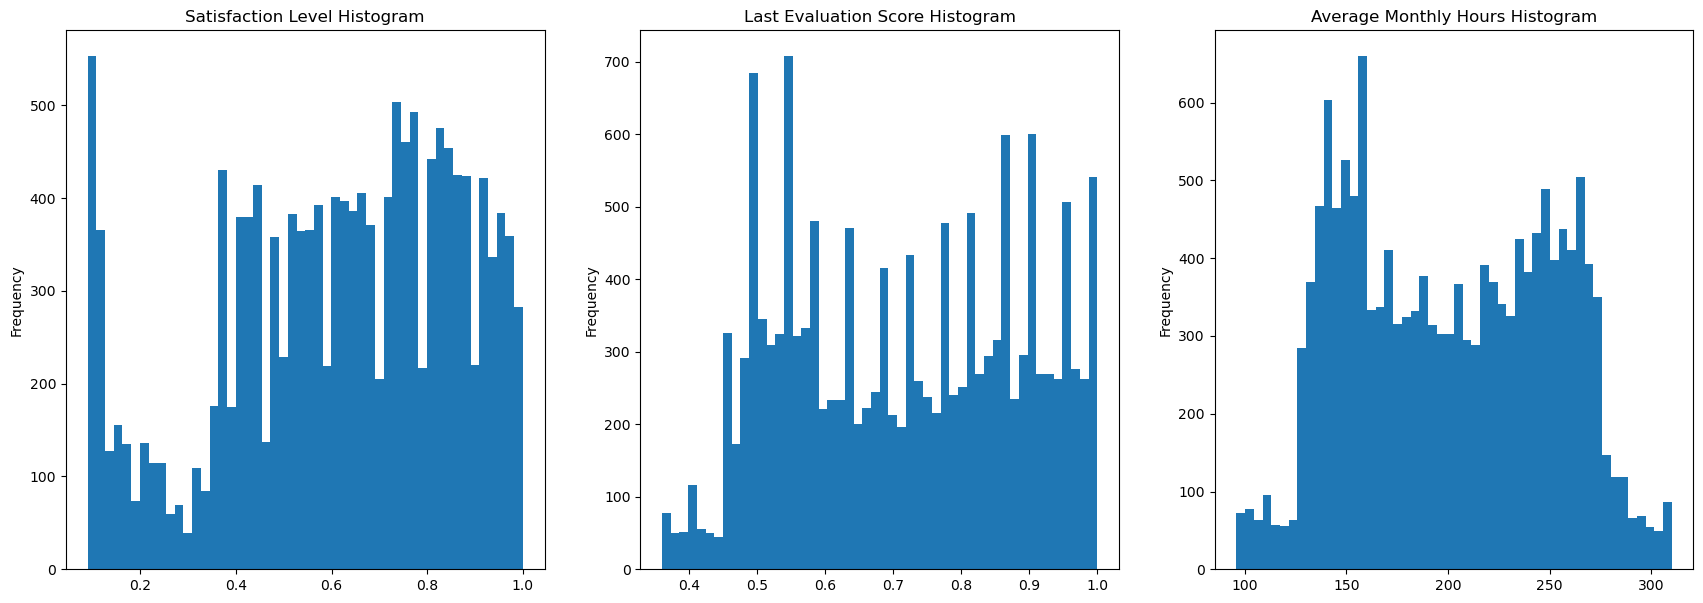

In [14]:

fig, ax = plt.subplots(ncols=3, figsize=(21,7))
df['satisfaction_level'].plot(kind='hist',bins=50,ax=ax[0])
ax[0].set_title('Satisfaction Level Histogram')
df['last_evaluation'].plot(kind='hist',bins=50,ax=ax[1])
ax[1].set_title('Last Evaluation Score Histogram')
df['average_monthly_hours'].plot(kind='hist',bins=50,ax=ax[2])
ax[2].set_title('Average Monthly Hours Histogram')

Text(0.5, 1.0, 'Years spent in the company Histogram')

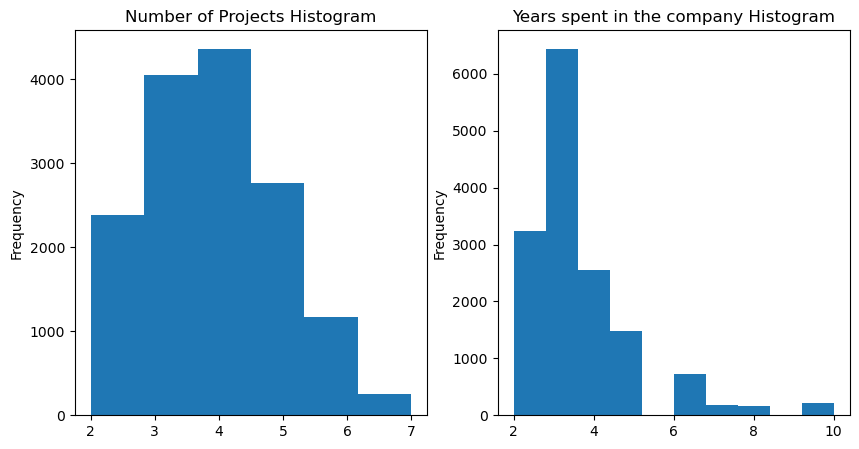

In [15]:

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
df['number_project'].plot(kind='hist',bins=6,ax=ax[0])
ax[0].set_title('Number of Projects Histogram')
df['time_spend_company'].plot(kind='hist',bins=10,ax=ax[1])
ax[1].set_title('Years spent in the company Histogram')

Most of the data are not distributed normally. The closest to a normal distribution is Number of Projects, though it still show some skewness. 

We can see that satisfaction level and last evaluation scores are spread out all over the range, while average monthly hours are huddled up in the middle with low-frequency in the extreme low and extreme highs. It's concerning how there are still high frequencies above 176 hour mark (the 22 days 8 hours a day mark), which means overtime work seems quite common.

Years spent in the company appears very skewed with 3 being the most frequent answer while there's not much at more than 5 years.

I don't think we're going to drop people who worked longer out of the data, though. We want to see the full picture.

Let's check the boxplot, just curious, even though I don't think I'll be removing any outlier. Maybe I will after seeing the boxplots.

Text(0.5, 1.0, 'AVG monthly hours Boxplot')

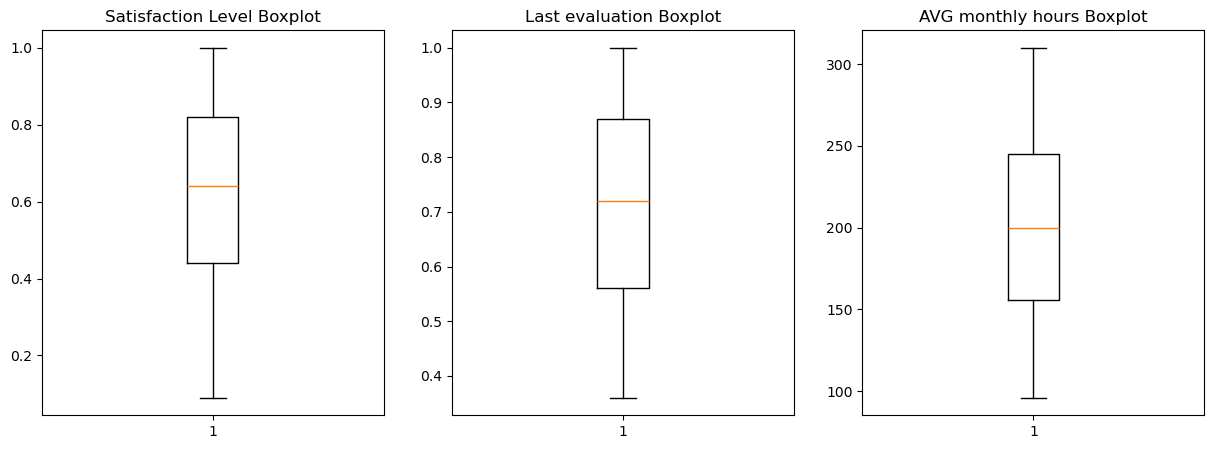

In [16]:

fig, ax = plt.subplots(ncols=3, figsize=(15,5))
ax[0].boxplot(df['satisfaction_level'])
ax[0].set_title('Satisfaction Level Boxplot')
ax[1].boxplot(df['last_evaluation'])
ax[1].set_title('Last evaluation Boxplot')
ax[2].boxplot(df['average_monthly_hours'])
ax[2].set_title('AVG monthly hours Boxplot')

Text(0.5, 1.0, 'Time spent in the company Boxplot')

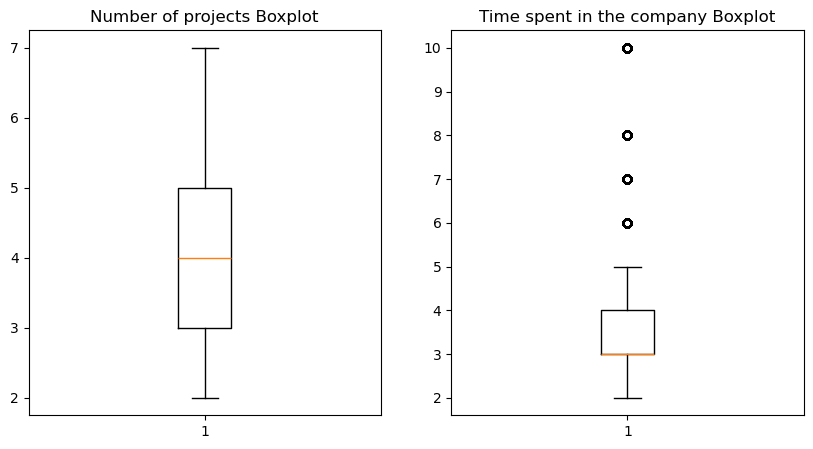

In [17]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].boxplot(df['number_project'])
ax[0].set_title('Number of projects Boxplot')
ax[1].boxplot(df['time_spend_company'])
ax[1].set_title('Time spent in the company Boxplot')

We can conclude that there are no outliers on most numerical data except for time spent in the company. We want to figure out if a long stay in a company signs employee satisfaction, so we're not removing the outliers.

Let's see the spread of categorical data next. We'll be using bar charts.

In [18]:
# to see the exact count of categorical data
df['dept'].value_counts()

dept
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

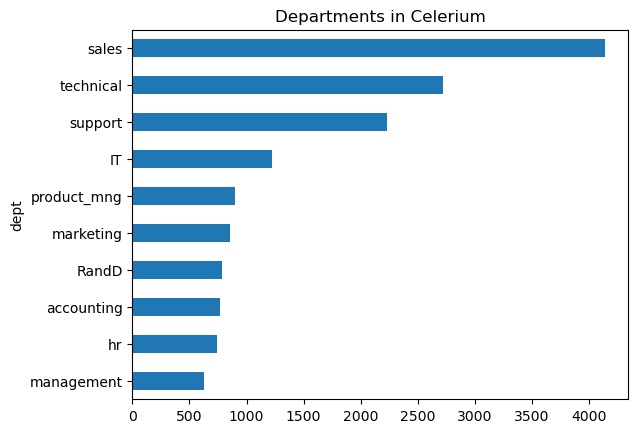

In [19]:

plt.plot()
df['dept'].value_counts().sort_values().plot(kind = 'barh')
plt.title("Departments in Celerium")
plt.show()



We can see here that the biggest department in Celerium is sales, followed by technical and support in the top 3. IT and Product Management follows completing the top 5.

In [20]:
# to see the exact count of categorical data
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

Text(0.5, 1.0, 'Salaries in Celerium')

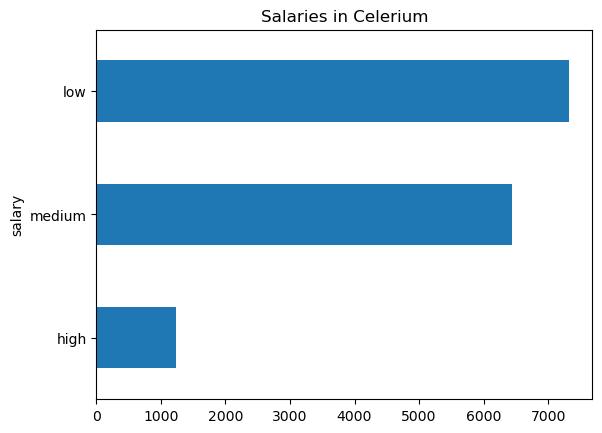

In [21]:
df['salary'].value_counts().sort_values().plot(kind = 'barh')
plt.title('Salaries in Celerium')

Text(0.5, 1.0, 'Distribution of Salary Ranges in Celerium')

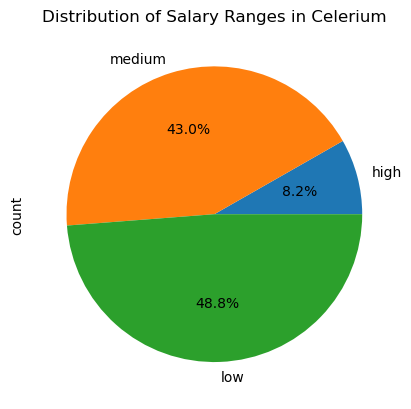

In [22]:
df['salary'].value_counts().sort_values().plot(kind = 'pie', autopct="%.1f%%")
plt.title('Distribution of Salary Ranges in Celerium')

Most employees fall into the low salary category, comprising of almost half of all employees. Medium not far behind from low with 43%, and high-salaried employees are relatively few. The low salary can be an attributor to low level of satisfaction (Bhardwaj et al., 2021)

In [23]:
# to see the exact count of categorical data
df['work_accident'].value_counts()

work_accident
0.0    12830
1.0     2169
Name: count, dtype: int64

Text(0.5, 1.0, 'Work Accidents in Celerium, 0: never, 1:experienced work accident')

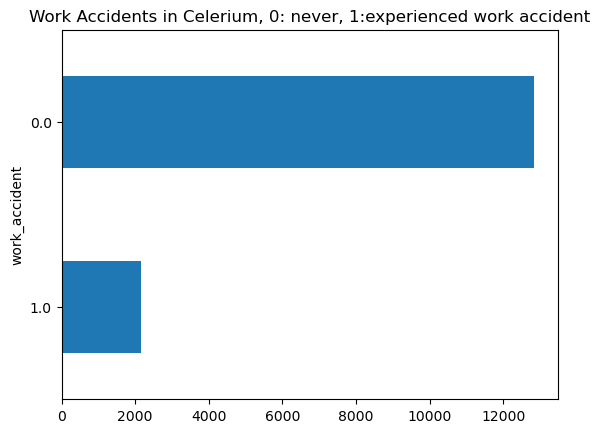

In [24]:
df['work_accident'].value_counts().sort_values().plot(kind = 'barh')
plt.title('Work Accidents in Celerium, 0: never, 1:experienced work accident')

Most employee has never been in a work accident. This can tell us that Celerium cars for the safety of their employees to the point of preventing work accidents. Shown care for employees' safety and safe working environment has been shown to have a positive correlation to employee satisfaction on previous studies such as (Bhardwaj,  2021)

In [25]:
# to see the exact count of categorical data
df['promotion_last_5years'].value_counts()

promotion_last_5years
0.0    14680
1.0      319
Name: count, dtype: int64

Text(0.5, 1.0, 'Promotion in Celerium in the last 5 years: 0: no, 1: experienced promotion')

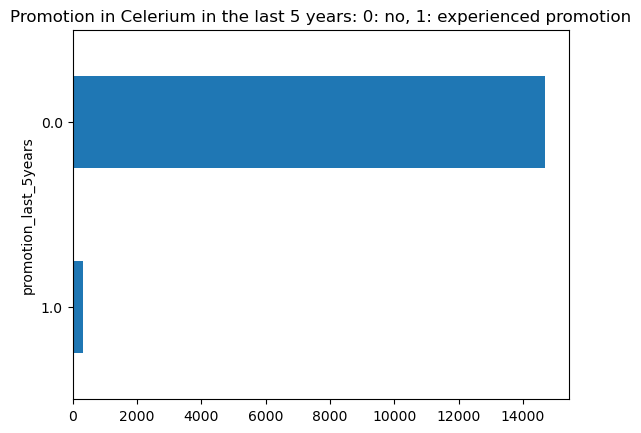

In [26]:
df['promotion_last_5years'].value_counts().sort_values().plot(kind = 'barh')
plt.title('Promotion in Celerium in the last 5 years: 0: no, 1: experienced promotion')

Most of the employees in Celerium has never been promoted in the last 5 years. This might hint into cause of low satisfaction: no appreciation in form of promotion. Promotion has been known to be a positive factor to employee satisfaction. (Bhardwaj et al., 2021)

### Correlation Test

In [27]:
# getting only numerical data 
dfNum = pd.DataFrame()

dfNum['Employee Satisfaction'] = df['satisfaction_level']
dfNum['Last Evaluation'] = df['last_evaluation']
dfNum['Number of Projects'] = df['number_project']
dfNum['AVG monthly working hours'] = df['average_monthly_hours']
dfNum['Time spent in the company'] = df['time_spend_company']

dfNum.head()

,Employee Satisfaction,Last Evaluation,Number of Projects,AVG monthly working hours,Time spent in the company
0,0.38,0.53,2.0,157.0,3.0
1,0.80,0.86,5.0,262.0,6.0
2,0.11,0.88,7.0,272.0,4.0
3,0.72,0.87,5.0,223.0,5.0
4,0.37,0.52,2.0,159.0,3.0


In [28]:
dfNum.corr()

,Employee Satisfaction,Last Evaluation,Number of Projects,AVG monthly working hours,Time spent in the company
Employee Satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866
Last Evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
Number of Projects,-0.142970,0.349333,1.000000,0.417211,0.196786
AVG monthly working hours,-0.020048,0.339742,0.417211,1.000000,0.127755
Time spent in the company,-0.100866,0.131591,0.196786,0.127755,1.000000


There doesn't seem to be any strong correlation between the numerical data; no multicollinearity.

### Conclusion of data exploration through descriptive statistics:

There are some hints I got from looking at the data that may hint why so many answered a 1 out of 10 satisfaction score:
- Low salary for around half of the company
- Low promotion chance, employees may feel there's nothing to strive for
- Long work hours

There are also some good things that Celerium has done for their employees:
- Good retention, most are working in Celerium for three years or more. 
    
    Going off the tracks here: it begs a question, what happened three years ago that there's a spike in hiring? We may never know for we don't have the data for that.
- Low count of work accidents throughout employee's entire employment in Celerium.
- There are more highly-scored employees than lower-scored ones on evaluation. This means Celerium are able to train and direct employees to what they're supposed to do. Though, the mode being 55 out of 100 means there's still room for improvement.

I don't know how complex each projects are to judge whether Celerium's employees are involved in too many projects or not. Context is important.

## Inferential Statistics

I'm going to be doing chi-square tests to see dependency among variables. Chi-square tests are not good for checking dependencies between numerical data and categorical data, so the numerical data would need to be binned into several bins/categories first.

### Binning

#### Satisfaction Level

In [29]:
# binning satisfaction level

SatisLevelBin = []

for i in df['satisfaction_level']:
    if i > 0 and i <= 0.2: SatisLevelBin.append('Very Low')
    elif i > 0.2 and i <= 0.4: SatisLevelBin.append('Low')
    elif i > 0.4 and i <= 0.6: SatisLevelBin.append('Neutral')
    elif i > 0.6 and i <= 0.8: SatisLevelBin.append('High')
    else: SatisLevelBin.append('Very High')

# appending to the dataframe
df['satisfaction_level_binned'] = SatisLevelBin

# checking if the binning is correct
df1 = df[['satisfaction_level', 'satisfaction_level_binned']]
df1.iloc[120:141]


,satisfaction_level,satisfaction_level_binned
120,0.14,Very Low
121,0.40,Low
122,0.75,High
123,0.11,Very Low
124,0.46,Neutral
125,0.11,Very Low
126,0.38,Low
127,0.70,High
128,0.09,Very Low
129,0.37,Low


In [30]:
# checking if the binning is correct

df1 = df[['satisfaction_level', 'satisfaction_level_binned']]
df1.iloc[120:141]

,satisfaction_level,satisfaction_level_binned
120,0.14,Very Low
121,0.40,Low
122,0.75,High
123,0.11,Very Low
124,0.46,Neutral
125,0.11,Very Low
126,0.38,Low
127,0.70,High
128,0.09,Very Low
129,0.37,Low


#### Last Evaluation Score

In [31]:
# binning last evaluation score

LastEvalBin = []

for i in df['last_evaluation']:
    if i > 0 and i <= 0.2: LastEvalBin.append('Very Poor')
    elif i > 0.2 and i <= 0.4: LastEvalBin.append('Poor')
    elif i > 0.4 and i <= 0.6: LastEvalBin.append('So-so')
    elif i > 0.6 and i <= 0.8: LastEvalBin.append('Good')
    else: LastEvalBin.append('Very Good')

# appending to the dataframe
df['last_evaluation_binned'] = LastEvalBin

# checking if the binning is correct
df2 = df[['last_evaluation', 'last_evaluation_binned']]
df2.iloc[121:142]

,last_evaluation,last_evaluation_binned
121,0.46,So-so
122,1.00,Very Good
123,0.84,Very Good
124,0.49,So-so
125,0.92,Very Good
126,0.49,So-so
127,0.89,Very Good
128,0.82,Very Good
129,0.45,So-so
130,0.83,Very Good


#### Number of Projects

In [32]:
#binning number of project (min =2, max=7)

ProjectBin = []

for i in df['number_project']:
    if i <= 3: ProjectBin.append('2-3 Projects')
    elif i == 4: ProjectBin.append('4 Projects')
    elif i == 5: ProjectBin.append('5 Projects')
    elif i == 6: ProjectBin.append('6 Projects')
    else: ProjectBin.append('7 Projects')

# appending to the dataframe
df['number_project_binned'] = ProjectBin

# checking if the binning is correct
df3 = df[['number_project', 'number_project_binned']]
df3.iloc[121:142]

,number_project,number_project_binned
121,2.0,2-3 Projects
122,4.0,4 Projects
123,6.0,6 Projects
124,2.0,2-3 Projects
125,6.0,6 Projects
126,2.0,2-3 Projects
127,3.0,2-3 Projects
128,6.0,6 Projects
129,2.0,2-3 Projects
130,6.0,6 Projects


#### AVG Monthly Hours

In [33]:
# binning monthly hours

df['average_monthly_hours'].describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_monthly_hours, dtype: float64

So the min is 96 hours while the max is 310.

In [34]:
# binning monthly hours

(310-96)/5

42.8

The bins need to be 42.8 hours each, in 5 bins scenario.

In [35]:
# binning monthly hours

MonthlyHoursBin = []

for i in df['average_monthly_hours']:
    if i > 96 and i <= 138.8: MonthlyHoursBin.append('Low')
    elif i > 138.8 and i <= 181.6: MonthlyHoursBin.append('A Bit Low/Right') # remember 22 days a month 8 hours a day = 176
    elif i > 181.6 and i <= 224.4: MonthlyHoursBin.append('A Bit High')
    elif i > 224.4 and i <= 267.2: MonthlyHoursBin.append('High')
    else: MonthlyHoursBin.append('Very High')

# appending to the dataframe
df['average_monthly_hours_binned'] = MonthlyHoursBin

# checking if the binning is correct
df4 = df[['average_monthly_hours', 'average_monthly_hours_binned']]
df4.iloc[121:142]

,average_monthly_hours,average_monthly_hours_binned
121,135.0,Low
122,216.0,A Bit High
123,300.0,Very High
124,138.0,Low
125,260.0,High
126,132.0,Low
127,183.0,A Bit High
128,250.0,High
129,151.0,A Bit Low/Right
130,292.0,Very High


Time Spent in Company (column name: 'time_spend_company') will not be binned as there's little continuous value in that data to the point it behaves like a categorical column as far as chi-square test is concerned.

### Hypothesis Testing

#### Last Evaluation Score on Satisfaction Level

To see if performance and/or appreciation (in shape of scores) affect employee's satisfaction level.

 ##### H0 : There is no relationship between Satisfaction Level and Last Evaluation Score

H1 : There is a relationship between Satisfaction Level and Last Evaluation Score

In [36]:
# contingency table:

contingency_table = pd.crosstab(df['satisfaction_level_binned'],df['last_evaluation_binned']).reindex([
    'Very High', 'High', 'Neutral', 'Low', 'Very Low' ])[[
    'Poor', 'So-so', 'Good', 'Very Good']]

contingency_table

last_evaluation_binned,Poor,So-so,Good,Very Good
satisfaction_level_binned,,,,
Very High,29,906,1311,1756
High,59,1003,1492,1714
Neutral,75,1620,1049,861
Low,59,1038,308,241
Very Low,14,160,387,917


In [37]:
# chi squared test:

res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 0.0


##### P-value returns 0.0, which is less than the critical value of 0.05 within 95% confidence level. Therefore, H1 cannot be rejected, there is a relationship between Satisfaction Level and Last Evaluation Score.

Let's see it with a heatmap.

In [38]:
# doing this to see the percentage of population in each 
contingency_table1 = pd.crosstab(df['satisfaction_level_binned'],df['last_evaluation_binned'],normalize='columns').reindex([
    'Very High', 'High', 'Neutral', 'Low', 'Very Low' ])[[
    'Poor', 'So-so', 'Good', 'Very Good']]

contingency_table1

last_evaluation_binned,Poor,So-so,Good,Very Good
satisfaction_level_binned,,,,
Very High,0.122881,0.191665,0.288322,0.319913
High,0.250000,0.212185,0.328128,0.312261
Neutral,0.317797,0.342712,0.230702,0.156859
Low,0.250000,0.219590,0.067737,0.043906
Very Low,0.059322,0.033848,0.085111,0.167061


Text(50.722222222222214, 0.5, 'Satisfaction Level')

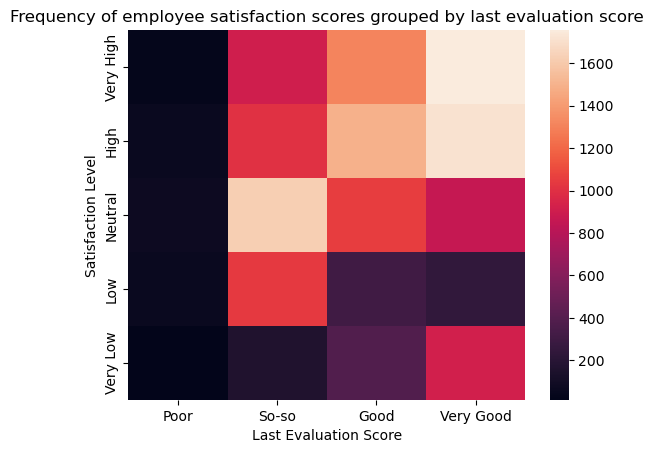

In [39]:
# making heatmap of satisfaction level scores grouped by eval score bins

fig,ax = plt.subplots()
sns.heatmap(contingency_table)
ax.set_title('Frequency of employee satisfaction scores grouped by last evaluation score')
plt.xlabel('Last Evaluation Score')
plt.ylabel('Satisfaction Level')

From this heatmap we can see that a lot of people who are scored with Good (6-8 out of 10) and Very Good (8-10 out of 10) mostly stated that they're satisfied with their jobs. While employees who were rated poor and so-so (4-6 out of 10) on their performance are more likely to report a Neutral (4-6 out of 10) or Low (2-4 out of 10) satisfaction score.

**However...**

You see that in Poor evaluation group, it's all black. It's because there's low frequency in that group. But that means we can't see the satisfaction levels reported by people in that group. **So, I think it's better to show the colors as percentages of people in each group.**


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Very High'),
  Text(0, 1.5, 'High'),
  Text(0, 2.5, 'Neutral'),
  Text(0, 3.5, 'Low'),
  Text(0, 4.5, 'Very Low')])

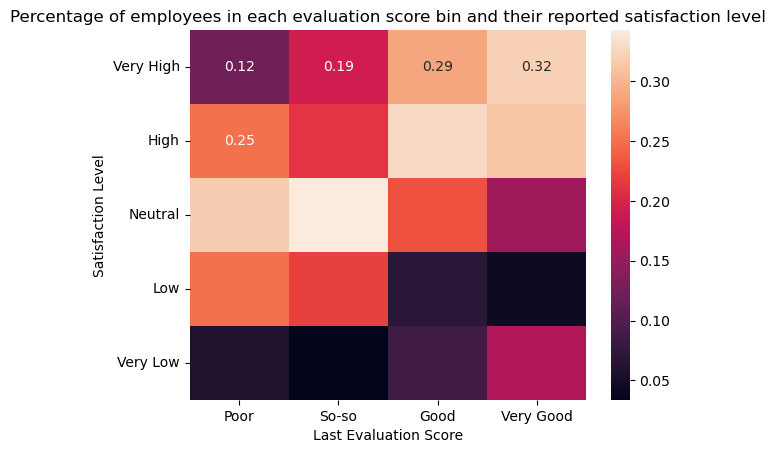

In [40]:
#making heatmap of how many percentage from eval score group that reported which satisfaction level

fig,ax = plt.subplots()
sns.heatmap(contingency_table1, annot=True)
ax.set_title('Percentage of employees in each evaluation score bin and their reported satisfaction level')
plt.xlabel('Last Evaluation Score')
plt.ylabel('Satisfaction Level')
plt.yticks(rotation=0)

( Notice: I have looked up why the labels don't show up for each rectangle in the heatmap (in VS code) apparently it's a Seaborn/Matplotlib lib bug thing and I can't seem to fix the problem--so like, it's not an error on my fault, it's the lib )

This heatmap have each rectangle representing the percentage of employees each of their last evaluation score grouping. So, 0.32, or, 32% people in Very Good last-evaluation score (8-10 out of 10) reported Very High satisfaction level (8-10 out of 10), while only 12% of employees with Poor evaluation score (2-4 out of 10) reported Very High satisfaction levels.

I feel like many factors can affect evaluation scores, such as personal politics, supervisor's bias in scoring, etc. I'll advise on focusing on employee's skills and performance and see if it can be improved further so that the employees can feel more achieved and hence feel more satisfied.

#### Number of Projects on Satisfaction Level

To see if the number of projects have a relationship with satisfaction level.

 ##### H0 : There is no relationship between Satisfaction Level and Number of Projects

H1 : There is a relationship between Satisfaction Level and Last Number of Projects

In [41]:
# contingency table:

contingency_table3 = pd.crosstab(df['satisfaction_level_binned'],df['number_project_binned']).reindex([
    'Very High', 'High', 'Neutral', 'Low', 'Very Low' ])[[
    '2-3 Projects', '4 Projects', '5 Projects', '6 Projects', '7 Projects']]

contingency_table3

number_project_binned,2-3 Projects,4 Projects,5 Projects,6 Projects,7 Projects
satisfaction_level_binned,,,,,
Very High,1428,1493,998,83,0
High,1686,1557,922,102,1
Neutral,2107,950,447,97,4
Low,1097,207,186,146,10
Very Low,125,158,208,746,241


In [42]:
# chi squared test:

res = stats.chi2_contingency(contingency_table3)
print("P-value:",res.pvalue)

P-value: 0.0


##### P-value returns 0.0, which is less than the critical value of 0.05 within 95% confidence level. Therefore, H1 cannot be rejected, there is a relationship between Satisfaction Level and Number of Projects.

Let's see it with a heatmap.

In [43]:
# checking out percentage of people in each project number group picked which satisfaction level
contingency_table4 = pd.crosstab(df['satisfaction_level_binned'],df['number_project_binned'],normalize='columns').reindex([
    'Very High', 'High', 'Neutral', 'Low', 'Very Low' ])[[
    '2-3 Projects', '4 Projects', '5 Projects', '6 Projects', '7 Projects']]

contingency_table4

number_project_binned,2-3 Projects,4 Projects,5 Projects,6 Projects,7 Projects
satisfaction_level_binned,,,,,
Very High,0.221636,0.342039,0.361463,0.070698,0.000000
High,0.261679,0.356701,0.333937,0.086882,0.003906
Neutral,0.327022,0.217640,0.161898,0.082624,0.015625
Low,0.170262,0.047423,0.067367,0.124361,0.039062
Very Low,0.019401,0.036197,0.075335,0.635434,0.941406


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Very High'),
  Text(0, 1.5, 'High'),
  Text(0, 2.5, 'Neutral'),
  Text(0, 3.5, 'Low'),
  Text(0, 4.5, 'Very Low')])

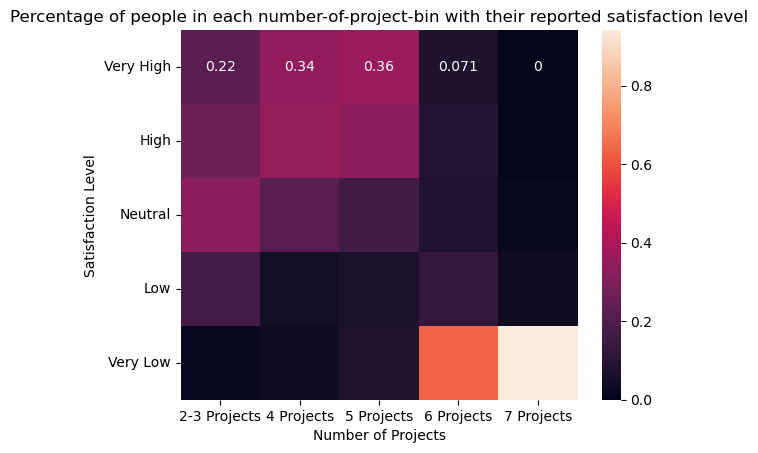

In [44]:
fig,ax = plt.subplots()
sns.heatmap(contingency_table4, annot=True)
ax.set_title('Percentage of people in each number-of-project-bin with their reported satisfaction level')
plt.xlabel('Number of Projects')
plt.ylabel('Satisfaction Level')
plt.yticks(rotation=0)

What we can see is that 94.14% percent of people handling 7 projects reported Very Low (0-2 out of 10) satisfaction level, while the least project like 2-3,4,5 shows higher ~20-35% spread among Neutral, High, and Very High (4-10 out of 10 combined) satisfaction level. 63.5% of people handling 6 projects reported Very Low satisfaction level.

So from this heatmap we can see that the more projects, the worse the satisfaction level gets. The sweet spot seems to be 4-5 projects, where people reported more Very High and High satisfaction levels and less of Very Low and Low satisfaction level. At 7 projects, the percentage of people reporting higher-than-Very-Low satisfaction level is less than 10%.

I can advise a simple policy where an employees are not allowed to handle more than 5 projects at one time. If it does happen, their supervisor can get fines for not managing to handle projects accordingly. They should then have a consulting session with their supervisor and HR to talk about why the projects were not handled accordingly to the point of overworking employees, and how to best solve it.

#### Average Monthly Working Hours on Satisfaction Level

To see if the average monthly working hours have a relationship with satisfaction level.

 ##### H0 : There is no relationship between Satisfaction Level and Average Monthly Working Hours

H1 : There is a relationship between Satisfaction Level and Average Monthly Working Hours

In [45]:
df['average_monthly_hours_binned'].value_counts()

average_monthly_hours_binned
A Bit Low/Right    4455
High               4146
A Bit High         3340
Low                1601
Very High          1457
Name: count, dtype: int64

In [46]:
# contingency table:

contingency_table5 = pd.crosstab(df['satisfaction_level_binned'],df['average_monthly_hours_binned']).reindex([
    'Very High', 'High', 'Neutral', 'Low', 'Very Low' ])[[
    'Low', 'A Bit Low/Right', 'A Bit High', 'High', 'Very High']]

contingency_table5

average_monthly_hours_binned,Low,A Bit Low/Right,A Bit High,High,Very High
satisfaction_level_binned,,,,,
Very High,233,1022,1059,1434,254
High,304,1182,1113,1389,280
Neutral,569,1355,779,709,193
Low,445,742,218,150,91
Very Low,50,154,171,464,639


In [47]:
# chi squared test:

res = stats.chi2_contingency(contingency_table5)
print("P-value:",res.pvalue)

P-value: 0.0


##### P-value returns 0.0, which is less than the critical value of 0.05 within 95% confidence level. Therefore, H1 cannot be rejected, there is a relationship between Satisfaction Level and Average Monthly Working Hours.

Let's see it with a heatmap.

In [48]:
# contingency table to see how many percentage of each group reported which satisfaction level

contingency_table6 = pd.crosstab(df['satisfaction_level_binned'],df['average_monthly_hours_binned'],normalize='columns').reindex([
    'Very High', 'High', 'Neutral', 'Low', 'Very Low' ])[[
    'Low', 'A Bit Low/Right', 'A Bit High', 'High', 'Very High']]

contingency_table6

average_monthly_hours_binned,Low,A Bit Low/Right,A Bit High,High,Very High
satisfaction_level_binned,,,,,
Very High,0.145534,0.229405,0.317066,0.345876,0.174331
High,0.189881,0.265320,0.333234,0.335022,0.192176
Neutral,0.355403,0.304153,0.233234,0.171008,0.132464
Low,0.277951,0.166554,0.065269,0.036179,0.062457
Very Low,0.031230,0.034568,0.051198,0.111915,0.438572


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'Low'),
  Text(1.5, 0, 'A Bit Low/Right'),
  Text(2.5, 0, 'A Bit High'),
  Text(3.5, 0, 'High'),
  Text(4.5, 0, 'Very High')])

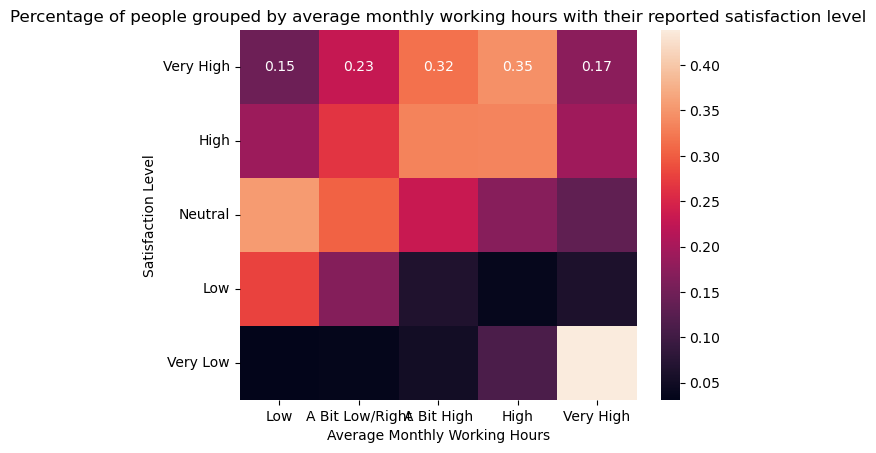

In [49]:
fig,ax = plt.subplots()
sns.heatmap(contingency_table6, annot=True)
ax.set_title('Percentage of people grouped by average monthly working hours with their reported satisfaction level')
plt.xlabel('Average Monthly Working Hours')
plt.ylabel('Satisfaction Level')
plt.yticks(rotation=0)
plt.xticks(rotation=0)

Similar with previous heatmap, it appears that 43.86% people with Very High (267.2 - 310 AVG monthly working hours) reported Very Low satisfaction level. The higher the average monthly working hours, the less satisfied employees are.

Though it seems there's some kind of threshold. See that people with Low and A Bit Low AVG Monthly Working Hours (96 - 181.6 hours combined) doesn't really report High and Very High satisfaction level--they mostly report Neutral. While employees with A Big High and High AVG Monthly Working Hours (181 - 267.2 hours combined) reported more High and Very High satisfaction levels compared to employees with less AVG Monthly Working hours.

The theory that people likes to be engaged and hates to be bored seems to be proven here. There may not be enough engagement for people with less AVG Monthly Working Hours. **But!** give too much work and the satisfaction level will plummet.

We can advise a policy that just bans too much overtime work. So, we can ban people from working more than 267.2 hours each month, which is around 4 hours of overwork each working day. If people work more than that hour in a month, they'll get either fines or get a consulting session with their superior and/or HR to talk about their time management and workload. The fine should be big. This can be measured by the clock-in clock-out time difference.

#### Time Spent in Company on Satisfaction Level

To see if how long employees have been in the company have a relationship with satisfaction level.

 ##### H0 : There is no relationship between Satisfaction Level and Time Spent in Company

H1 : There is a relationship between Satisfaction Level and Time Spent in Company

In [50]:
# contingency table:

contingency_table7 = pd.crosstab(df['satisfaction_level_binned'],df['time_spend_company']).reindex([
    'Very High', 'High', 'Neutral', 'Low', 'Very Low' ])[[
    2, 3, 4, 5, 6, 7, 8, 10]]

contingency_table7

time_spend_company,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0
satisfaction_level_binned,,,,,,,,
Very High,1041,1566,487,526,214,62,48,58
High,1144,1787,571,402,198,44,56,66
Neutral,867,1984,377,119,104,50,40,64
Low,148,991,180,179,100,16,12,20
Very Low,44,115,942,247,102,16,6,6


In [51]:
# chi squared test:

res = stats.chi2_contingency(contingency_table7)
print("P-value:",res.pvalue)

P-value: 0.0


##### P-value returns 0.0, which is less than the critical value of 0.05 within 95% confidence level. Therefore, H1 cannot be rejected, there is a relationship between Satisfaction Level and Time Spent in Company.

Let's see it with a heatmap.

In [52]:
#contingency table for heatmap

contingency_table8 = pd.crosstab(df['satisfaction_level_binned'],df['time_spend_company'],normalize='columns').reindex([
    'Very High', 'High', 'Neutral', 'Low', 'Very Low' ])[[
    2, 3, 4, 5, 6, 7, 8, 10]]

contingency_table8

time_spend_company,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0
satisfaction_level_binned,,,,,,,,
Very High,0.320900,0.243054,0.190458,0.357094,0.298050,0.329787,0.296296,0.271028
High,0.352651,0.277355,0.223309,0.272912,0.275766,0.234043,0.345679,0.308411
Neutral,0.267263,0.307931,0.147438,0.080788,0.144847,0.265957,0.246914,0.299065
Low,0.045623,0.153810,0.070395,0.121521,0.139276,0.085106,0.074074,0.093458
Very Low,0.013564,0.017849,0.368400,0.167685,0.142061,0.085106,0.037037,0.028037


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Very High'),
  Text(0, 1.5, 'High'),
  Text(0, 2.5, 'Neutral'),
  Text(0, 3.5, 'Low'),
  Text(0, 4.5, 'Very Low')])

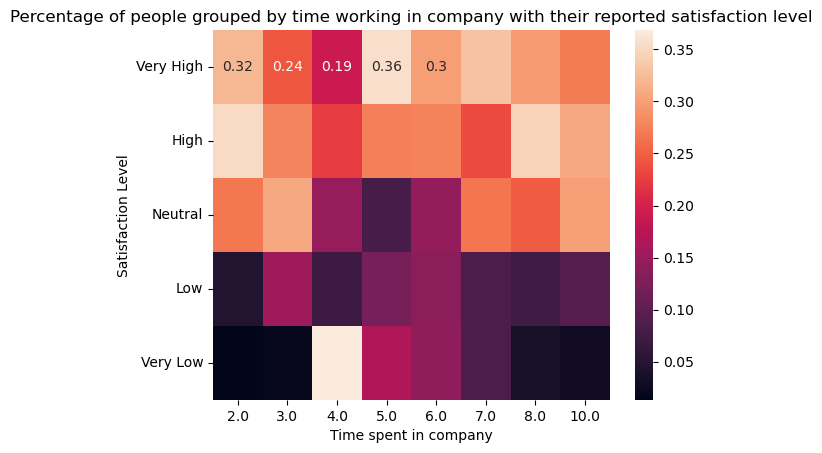

In [53]:
fig,ax = plt.subplots()
sns.heatmap(contingency_table8, annot=True)
ax.set_title('Percentage of people grouped by time working in company with their reported satisfaction level')
plt.xlabel('Time spent in company')
plt.ylabel('Satisfaction Level')
plt.yticks(rotation=0)

We can see the journey of satisfaction levels throughout the years employed that employees experienced. On year 2, they report mostly High and Very High satisfaction levels. On year 3 the most reported Satisfaction Level is Neutral. Then on year 4 the most reported Satisfaction Level is Very Low. It seems that's when people get bored and/or fed up with the work. Year 5 have comparably less population than Year 4 employees-- it's a hold-it-out-or-get-out situation, as year 5 and onwards have mostly reported Neutral to Very High satisfaction level.

There's really no policy to be made for this regard, though. Celerium is already doing a pretty good job in this aspect. We only gained how it relates to Satisfaction Level.

#### Work Accident on Satisfaction Level

To see if work accident have a relationship with satisfaction level.

 ##### H0 : There is no relationship between Satisfaction Level and Work Accident

H1 : There is a relationship between Satisfaction Level and Work Accident

In [54]:
# contingency table:

contingency_table9 = pd.crosstab(df['satisfaction_level_binned'],df['work_accident']).reindex([
    'Very High', 'High', 'Neutral', 'Low', 'Very Low' ])[[
    0, 1]]

contingency_table9

work_accident,0.0,1.0
satisfaction_level_binned,,
Very High,3378,624
High,3556,712
Neutral,3089,516
Low,1474,172
Very Low,1333,145


In [55]:
# chi squared test:

res = stats.chi2_contingency(contingency_table9)
print("P-value:",res.pvalue)

P-value: 4.749239509187844e-14


##### P-value returns 4.74 * 10^-14 , which is less than the critical value of 0.05 within 95% confidence level. Therefore, H1 cannot be rejected, there is a relationship between Work Accident and Satisfaction Level.

Let's see with a heatmap

In [56]:

#contingency table for heatmap
contingency_table10 = pd.crosstab(df['satisfaction_level_binned'],df['work_accident'],normalize='columns').reindex([
    'Very High', 'High', 'Neutral', 'Low', 'Very Low' ])[[
    0, 1]]

contingency_table10

work_accident,0.0,1.0
satisfaction_level_binned,,
Very High,0.263289,0.287690
High,0.277163,0.328262
Neutral,0.240764,0.237898
Low,0.114887,0.079299
Very Low,0.103897,0.066851


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Very High'),
  Text(0, 1.5, 'High'),
  Text(0, 2.5, 'Neutral'),
  Text(0, 3.5, 'Low'),
  Text(0, 4.5, 'Very Low')])

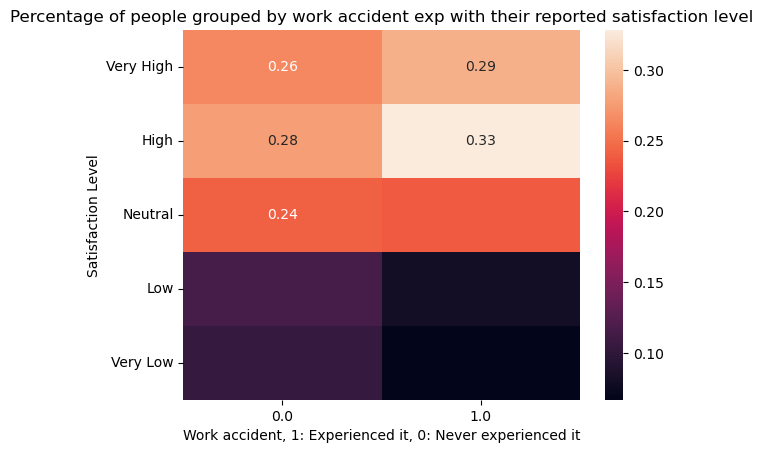

In [57]:
fig,ax = plt.subplots()
sns.heatmap(contingency_table10, annot=True)
ax.set_title('Percentage of people grouped by work accident exp with their reported satisfaction level')
plt.xlabel('Work accident, 1: Experienced it, 0: Never experienced it')
plt.ylabel('Satisfaction Level')
plt.yticks(rotation=0)

The Chi Square test returned that work accident is affecting, but the data doesn't really say so. We can see that people who never experienced work accidents does not generally higher Satisfaction Level score than people who experienced it.

We're ruling out work accident as a factor of work satisfaction in Celerium.

This means that people who were in work accidents are still satisfied nonetheless in Celerium.

#### Promotion Last 5 Years on Satisfaction Level

To see if promotion have a relationship with satisfaction level.

 ##### H0 : There is no relationship between Satisfaction Level and Promotion Last 5 Years

H1 : There is a relationship between Satisfaction Level and Promotion Last 5 Years

In [58]:
# contingency table:

contingency_table11 = pd.crosstab(df['satisfaction_level_binned'],df['promotion_last_5years']).reindex([
    'Very High', 'High', 'Neutral', 'Low', 'Very Low' ])[[
    0, 1]]

contingency_table11

promotion_last_5years,0.0,1.0
satisfaction_level_binned,,
Very High,3911,91
High,4171,97
Neutral,3509,96
Low,1626,20
Very Low,1463,15


In [59]:
# chi squared test:

res = stats.chi2_contingency(contingency_table11)
print("P-value:",res.pvalue)

P-value: 0.00029129676704170497


##### P-value returns 0.00029 , which is less than the critical value of 0.05 within 95% confidence level. Therefore, H1 cannot be rejected, there is a relationship between Promotion and Satisfaction Level.

Let's see it in a heatmap.

In [60]:
# contingency table for heatmap:

contingency_table12 = pd.crosstab(df['satisfaction_level_binned'],df['promotion_last_5years'],normalize='columns').reindex([
    'Very High', 'High', 'Neutral', 'Low', 'Very Low' ])[[
    0, 1]]

contingency_table12

promotion_last_5years,0.0,1.0
satisfaction_level_binned,,
Very High,0.266417,0.285266
High,0.284128,0.304075
Neutral,0.239033,0.300940
Low,0.110763,0.062696
Very Low,0.099659,0.047022


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Very High'),
  Text(0, 1.5, 'High'),
  Text(0, 2.5, 'Neutral'),
  Text(0, 3.5, 'Low'),
  Text(0, 4.5, 'Very Low')])

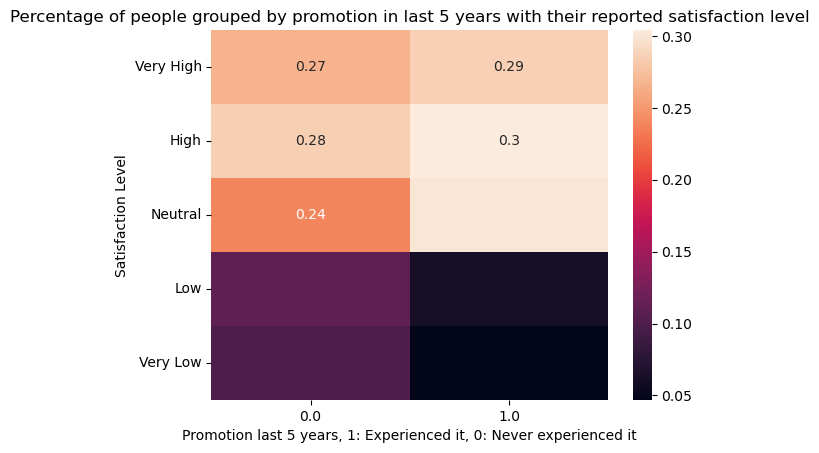

In [61]:
fig,ax = plt.subplots()
sns.heatmap(contingency_table12, annot=True)
ax.set_title('Percentage of people grouped by promotion in last 5 years with their reported satisfaction level')
plt.xlabel('Promotion last 5 years, 1: Experienced it, 0: Never experienced it')
plt.ylabel('Satisfaction Level')
plt.yticks(rotation=0)

Employees who experienced promotion in the last 5 years are showing more reports of higher Satisfaction Level than those not promoted in the last 5 years.

I can advise my clients to promote more of their employee, or, in other words, do internal hiring for empty higher-up positions.

#### Department on Satisfaction Level

To see if Department have a relationship with satisfaction level.

 ##### H0 : There is no relationship between Satisfaction Level and Department

H1 : There is a relationship between Satisfaction Level and Department

In [62]:
# contingency table:

contingency_table13 = pd.crosstab(df['satisfaction_level_binned'],df['dept']).reindex([
    'Very High', 'High', 'Neutral', 'Low', 'Very Low' ])
contingency_table13

dept,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
satisfaction_level_binned,,,,,,,,,,
Very High,333,219,189,185,144,230,252,1119,594,737
High,373,230,195,198,208,253,240,1163,652,756
Neutral,268,188,182,192,174,201,236,1003,527,634
Low,126,75,114,93,54,99,93,445,253,294
Very Low,127,75,87,71,50,75,81,410,203,299


In [63]:
# chi squared test:

res = stats.chi2_contingency(contingency_table13)
print("P-value:",res.pvalue)

P-value: 0.010203870607955839


##### P-value returns 0.01 , which is less than the critical value of 0.05 within 95% confidence level. Therefore, H1 cannot be rejected, there is a relationship between Department and Satisfaction Level.

We're going to see how it is with a heatmap.

In [64]:
# contingency table for heatmap:

contingency_table14 = pd.crosstab(df['satisfaction_level_binned'],df['dept'],normalize='columns').reindex([
    'Very High', 'High', 'Neutral', 'Low', 'Very Low' ])
contingency_table14

dept,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
satisfaction_level_binned,,,,,,,,,,
Very High,0.271394,0.278272,0.246415,0.250338,0.228571,0.268065,0.279379,0.270290,0.266487,0.270956
High,0.303993,0.292249,0.254237,0.267930,0.330159,0.294872,0.266075,0.280918,0.292508,0.277941
Neutral,0.218419,0.238882,0.237288,0.259811,0.276190,0.234266,0.261641,0.242271,0.236429,0.233088
Low,0.102689,0.095299,0.148631,0.125846,0.085714,0.115385,0.103104,0.107488,0.113504,0.108088
Very Low,0.103504,0.095299,0.113429,0.096076,0.079365,0.087413,0.089800,0.099034,0.091072,0.109926


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Very High'),
  Text(0, 1.5, 'High'),
  Text(0, 2.5, 'Neutral'),
  Text(0, 3.5, 'Low'),
  Text(0, 4.5, 'Very Low')])

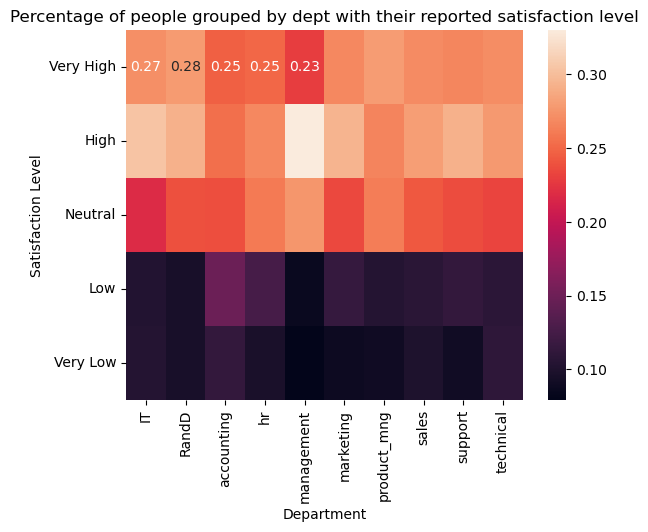

In [65]:
fig,ax = plt.subplots()
sns.heatmap(contingency_table14, annot=True)
ax.set_title('Percentage of people grouped by dept with their reported satisfaction level')
plt.xlabel('Department')
plt.ylabel('Satisfaction Level')
plt.yticks(rotation=0)

Though the Chi-Square test returns a result that shows a relationship, we can't tell which department are most satisfied. General pattern on the heatmap shows no difference between each department, except perhaps Accounting who reported more lower-satisfaction scores compared to other departments.

Based on the heatmap I'm going to rule out department's effect on satisfaction level. This heatmap also shows that there are around 20%-ish employees reporting lower satisfaction level per departments.

#### Salary on Satisfaction Level

To see if Salary have a relationship with satisfaction level.

 ##### H0 : There is no relationship between Satisfaction Level and Salary

H1 : There is a relationship between Satisfaction Level and Salary

In [66]:
# contingency table:

contingency_table15 = pd.crosstab(df['satisfaction_level_binned'],df['salary']).reindex([
    'Very High', 'High', 'Neutral', 'Low', 'Very Low' ])[[
    'low', 'medium', 'high']]
contingency_table15

salary,low,medium,high
satisfaction_level_binned,,,
Very High,1925,1757,320
High,1970,1888,410
Neutral,1727,1563,315
Low,886,648,112
Very Low,808,590,80


In [67]:
# chi squared test:

res = stats.chi2_contingency(contingency_table15)
print("P-value:",res.pvalue)

P-value: 2.747852006034944e-11


##### P-value returns 2.75*10^-11 , which is less than the critical value of 0.05 within 95% confidence level. Therefore, H1 cannot be rejected, there is a relationship between Sales and Satisfaction Level.

We're going to see how it is with a heatmap.

In [68]:
# contingency table for heatmap:

contingency_table16 = pd.crosstab(df['satisfaction_level_binned'],df['salary'],normalize='columns').reindex([
    'Very High', 'High', 'Neutral', 'Low', 'Very Low' ])[[
    'low', 'medium', 'high']]
contingency_table16

salary,low,medium,high
satisfaction_level_binned,,,
Very High,0.263122,0.272572,0.258690
High,0.269273,0.292895,0.331447
Neutral,0.236058,0.242476,0.254648
Low,0.121104,0.100527,0.090542
Very Low,0.110443,0.091530,0.064673


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Very High'),
  Text(0, 1.5, 'High'),
  Text(0, 2.5, 'Neutral'),
  Text(0, 3.5, 'Low'),
  Text(0, 4.5, 'Very Low')])

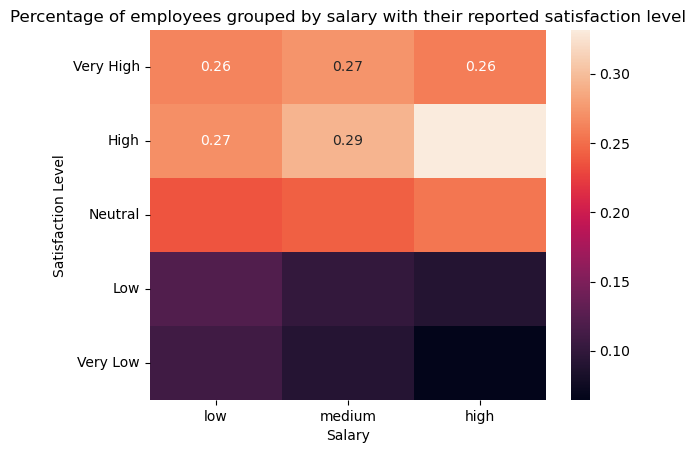

In [69]:
fig,ax = plt.subplots()
sns.heatmap(contingency_table16, annot=True)
ax.set_title('Percentage of employees grouped by salary with their reported satisfaction level')
plt.xlabel('Salary')
plt.ylabel('Satisfaction Level')
plt.yticks(rotation=0)

It's quite visible that employees with lower salary reports higher frequency of lower scores of Satisfaction Level compared to employees with mdeium or high salary. Employee with high salary reported highest proportion in High satisfaction level, with 33% reporting a High satisfaction level.

So, to answer the question, in Celerium, salary is a positive factor of satisfaction. Employees are going to be more satisfied with higher salary, hence Celerium can still motivate its employees with promises of salary raise.

## Answering the questions:

1.	What are the top three factors that affect employee satisfaction in Celerium? How do those factors work/affect employee satisfaction?

    This can actually answered if we're running a Multiple Linear Regression, but since this assignment is not for that, let's point out which factors shows the most drastic pattern in terms of change of Employee Satisfaction Level: Which are: Number of Projects, Average Monthly Working Hours, and Promotion.

    Too much projects makes employee not satisfied. The more projects there are the less the satisfaction level. There's too much for the brain to juggle, and it gets people frustrated. 

    Too much overtime also makes employee not satisfied. After around 267.2 average working hours per month (4~ hours of overtime per working day, or 3 hours overtime every working day + 3 hours working in weekends), people just get very much less satisfied with their work. Overtime takes time away from family and friends, and may make employee feel that they don't have control over their lives.

    Promoted employees report higher satisfaction levels than un-promoted, theory says it's because of appreciation and reward of work (Gupta, 2011). People feel appreciated, and then are willing to strive more for the company.

2.	Who are the employees that are least satisfied in Celerium?

    Accounting department shows the most lower-scored Satisfaction Level than any other departments, followed by Technical, IT, Sales, then HR.


3.	How does salary play a role in employee satisfaction in Celerium?

    In Celerium, the higher the salary, the higher the reported satisfaction level, so the general notion that higher salaries causes higher satisfaction still applies for Celerium.

## Policy advice:

- For Number of Projects: I can advise a simple policy where an employees are not allowed to handle more than 5 projects at one time. If it does happen, their supervisor can get fines for not managing to handle projects accordingly. They should then have a consulting session with their supervisor and HR to talk about why the projects were not handled accordingly to the point of overworking employees, and how to best solve it.

- For AVG Monthly Working Hours: We can advise a policy that just bans too much overtime work. So, we can ban people from working more than 267.2 hours each month, which is around 4 hours of overwork each working day. If people work more than that hour in a month, they'll get either fines or get a consulting session with their superior and/or HR to talk about their time management and workload. The fine should be big. This can be measured by the clock-in clock-out time difference.

- For Promotion: I can advise my clients to promote more of their employee, or, in other words, do internal hiring for empty higher-up positions as it has shown they get more satisfied with promotion.

## Other messages to tell them

There are some hints I got from looking at the data that may hint why so many answered a 1 out of 10 satisfaction score:
- Low salary for around half of the company
- Low promotion chance, employees may feel there's nothing to strive for
- Long work hours

There are also some good things that Celerium has done for their employees:
- Good retention, most are working in Celerium for three years or more. 
    
    Going off the tracks here: it begs a question, what happened three years ago that there's a spike in hiring? We may never know for we don't have the data for that.
- Low count of work accidents throughout employee's entire employment in Celerium.
- There are more highly-scored employees than lower-scored ones on evaluation. This means Celerium are able to train and direct employees to what they're supposed to do. Though, the mode being 55 out of 100 means there's still room for improvement.


# References

References:

    Ali, A., Hussain Khan, and A.S Akram Ch. 2018. "Level of Job Satisfaction among Employees of Banking Industries at Lahore, 2016." European Online Journal of Natural and Social Sciences: Proceedings 7, 3s, 92.
    
    Bhardwaj, Atishree, Swati Mishra, and Trilok Kumar Jain. 2020. "An analysis to understanding the job satisfaction of employees in banking industry." Materials Today Proceedings 37 783-795.

    Fabian, Mark, and Robert Breuning. 2019. "Long Work Hours and Job Satisfaction: Do Overworkers Get Trapped in Bad Jobs?" Social Science Quarterly Vol. 100 Issue. 5 1932-1956.

    Gupta, C. B. 2011. Human Resource Management. New Delhi: Sultan Chand & Sons.

    Ko, Young Jin, and Jin Nam Choi. 2018. "Overtime work as the antecedent of employee satisfaction, firm productivity, and innovation." Journal of Organizational Behavior Vol. 40 Issue 3 282-295.

    Lorber, Mateja, and Brigita Skela Savič. 2012. "Job satisfaction of nurses and identifying factors of job satisfaction in Slovenian Hospitals." Croatia Medical Journal, 53 263-270.

    Safi, M. H, and S. Arshi. 2016. "The Relationship between Perceived Organizational Justice and Organizational Commitment with Job Satisfaction in Employees of Northern Tehran Healthcare Center." 
    SALAMAT IJTIMAI - Community Health,2,3 172-181.

    Vorina, Anton, Miro Simonič, and Maria Vlasova. 2017. "An Analysis of the Relationship Between Job Satisfaction and Employee Engagement." Economic Times (55) (2) 243-262.
    
    Wong, Edward Sek Khin, and Dr. Teoh Ngee Heng. 2009. "Case Study of Factors Influencing Jobs Satisfaction in Two Malaysian Universities ." International Business Research Vol.2 No. 2 86-98.

